# Classification

* Let's study a non-parametric prediction method. 
* The goal of this method: classify something into one of a discrete number of types. 
* This is also known as 'supervised learning'. 

# Scikit-Learn

* Scikit-Learn is a major machine learning library that includes many reference data sets. 
* It has its own formats. 
* It's important to know how to translate to other formats to accomplish tasks. 

# The Iris Dataset

* There is one dataset that is so well-known that it bears mentioning in any context. 
* The *iris dataset* consists of a multidimensional array of iris characteristics used in determining species. 
* Let's explore this dataset and see if we can understand it. 

## The structure of many `sklearn` datasets

The **`iris`** dataset, among others, is a:
* A class
* Implemented as a dictionary. 
* Intended for testing machine-learning algorithms. 
* With fields that make sense for that task.
* Most entries are arrays in `numpy` format. 

Most other datasets, for example the diabetes dataset (loaded using `datasets.load_diabetes()`, analogous to `datasets.load_iris()` have similar structure.
Run the next cell to draw a diagram depicting this.

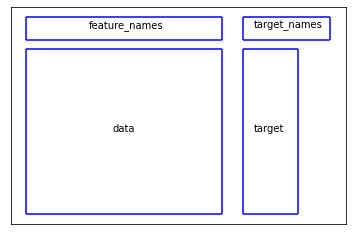

In [1]:
from matplotlib import pyplot as plt
from jdraw import Point, Rect
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Get current axes
frame = plt.gca()
# Turn off ticks
frame.axes.get_xaxis().set_ticks([])
frame.axes.get_yaxis().set_ticks([])

Rect(Point(2,2), Point(38,38), 'data').draw(plt)
Rect(Point(42,2), Point(52,38), 'target').draw(plt)
Rect(Point(2,40), Point(38, 45), 'feature_names').draw(plt)
Rect(Point(42,40), Point(58, 45), 'target_names').draw(plt)

In the above diagram,
* `data` is a matrix of features, every row being a sample and every column being a feature, expressed as integers from _0_ to _m-1_, where _m_ is the number of features in the data. In Scipy documentation, `data` is usually denoted by **X**.
* `feature_names` is an array of names corresponding to each _m_.
* `target` is the given classification of each row, expressed as integers from _0_ to _n-1_, where _n_ is the number of classes in the data. In Scipy documentation, the target is denoted by **y**.
* `target_names` (sometimes called `classes`) is an array of names corresponding to targets.

In [2]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

### 1. Show the `iris` data

Based on the above explanation, show the `iris` data as a pandas DataFrame. The column names should be the names of the features.

In [3]:
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 2. Show the `iris` target data

Also based on the above explanation, show the `iris` data _target_ as a pandas DataFrame. The entries should be the names of the classifications, as shown below.

In [4]:
pd.DataFrame(data=iris.target_names[iris.target]) 

,0
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


The `DESCR` attribute of the dataset describes the dataset.

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# How we approach classification: 
* Take all data into account. 
* Think of the data as a function from `data` to `target`.
* Approximate that function. 

# Then, if there is a new kind of iris, 
* Use the function to predict what species it is. 

# Let's run the demo provided by scikit-learn: 

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Declare a KNN classifier of a given complexity. The number of neighbors determines runtime.
knn = KNeighborsClassifier(n_neighbors=6)

# create a map between data and target. 
knn.fit(iris['data'], iris['target'])

# Provide data whose class labels are to be predicted
X = [
    [5.9, 1.0, 5.1, 1.8],
    [3.4, 2.0, 1.1, 4.8],
]

# Prints the data provided
print(X)

# Store predicted class labels of X
prediction = knn.predict(X)

# Prints the predicted class labels of X
print(prediction)

[[5.9, 1.0, 5.1, 1.8], [3.4, 2.0, 1.1, 4.8]]
[1 1]


This, according to the predictor, they're both species 1 of 0-2, in other words, _Iris-Versicolour_.

* Writing such a predictor is a complex task that we study in COMP 135. 
* You can read up on it here: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

For now, suffice it to say that from enough measurements, one can form a prediction 
from the instances that have been observed so far. This prediction can be accurate or inaccurate 
based upon the prediction method. 

# From whence comes accuracy
* You would be right to be suspicious of what I just did. 
* I didn't tell you anything at all about the prediction method. It is an "oracle". 
* How do we know that this worked? 

# Cross-validation
* Cross-validation is a standard technique in machine learning for testing classifiers. 
* Separate all feature data into 'training' and 'testing' subsets. 
* Train on the training subset. 
* Test on the testing subset. 
* See if you get the correct answers.

# Let's do this. I'll help.
* This is a different kind of exercise. 
* This is a real cross-validation using random data. 
* There is no one "correct" answer. 
* I can check your answers for sanity but not for correctness. 

First let's select rows of the data to use as training and testing data. This recipe selects them randomly. 

In [7]:
import random
selections = list(range(len(iris.data)))
random.shuffle(selections)
training_selections = selections[:130]
testing_selections = selections[130:]

# What this does
* `random.shuffle` scrambles the numbers between 0 and 149. 
* `training_selections` is a list of the array offsets for a training set. 
* `testing_selections` is a list of the array offsets for a testing set. 
* These are disjoint lists with no elements in common. 
* These represent a random sampling of the data in the iris database. 

In [8]:
print(training_selections)

[54, 70, 142, 16, 68, 45, 57, 113, 73, 123, 35, 37, 32, 25, 84, 78, 34, 92, 48, 111, 138, 69, 141, 110, 85, 14, 6, 93, 105, 44, 128, 36, 3, 17, 118, 80, 15, 20, 136, 145, 90, 87, 39, 2, 56, 146, 7, 148, 11, 49, 18, 21, 1, 115, 116, 12, 95, 132, 23, 131, 140, 62, 103, 112, 59, 31, 53, 61, 139, 27, 28, 74, 71, 88, 72, 107, 60, 99, 121, 117, 4, 86, 13, 101, 100, 127, 29, 79, 66, 129, 55, 89, 9, 114, 33, 104, 24, 120, 149, 50, 65, 126, 143, 38, 122, 82, 52, 30, 96, 75, 137, 67, 77, 135, 46, 51, 94, 109, 147, 63, 91, 76, 42, 81, 108, 97, 5, 41, 83, 64]


In [9]:
print(testing_selections)

[10, 43, 119, 106, 98, 144, 133, 130, 124, 26, 102, 58, 47, 19, 8, 134, 0, 125, 40, 22]


In [10]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('04-03-classification.ok')
ok.auth(inline=True) #, force=True

Assignment: Classification
OK, version v1.18.1

Successfully logged in as j.singh@datathinks.org


### 3. Create an array `training_features` that &hellip;

&hellip; consists of the rows of `iris.data` that match `training_selections`. 

In [11]:
# Your answer:
training_features = iris.data[training_selections]
training_features

array([[6.5, 2.8, 4.6, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3.9, 1.3, 0.4],
       [6.2, 2.2, 4.5, 1.5],
       [4.8, 3. , 1.4, 0.3],
       [4.9, 2.4, 3.3, 1. ],
       [5.7, 2.5, 5. , 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.2, 4.1, 1.5, 0.1],
       [5. , 3. , 1.6, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.9, 3.1, 1.5, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.3, 3.7, 1.5, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [6. , 3. , 4.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [6.9, 3.1, 5.1, 2.3],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [7.6, 3. , 6.6, 2.1],
       [5.1, 3.8, 1.9, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [7.7, 2

In [12]:
_ = ok.grade('q01')  # check answer for sanity

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### 4. Create an array `training_targets` that &hellip;

&hellip; consists of the rows of `iris.targets` that match `training_selections`. 

In [13]:
# Your answer
training_targets = iris.target[training_selections]

In [14]:
_ = ok.grade('q02')  # check answer for sanity

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### 5. Train a _kNN_ for _k_=6

Using the pattern above, train a kNN on the training data. Start with a new classifier `knn2` and just train on this. Hints:
* The constructor for the classifier will need to be `KNeighborsClassifier(n_neighbors=6)`
* To train the classifier, call its `fit` method with `training_features` and `training_targets` as arguments

In [15]:
# Your answer: 
# Declare a KNN classifier of a given complexity. The number of neighbors determines runtime.
import numpy as np

knn2 = KNeighborsClassifier(n_neighbors=6)

# create a map between data and target. 
knn2.fit(training_features, training_targets)
knn2

KNeighborsClassifier(n_neighbors=6)

### 6. Test the classifier

1. Create an array `testing_features` using the same pattern as for training data. 
1. Then, call the `predict` method of the trained classifier with `testing_features` as the argument, resulting in `predicted_targets`
1. Create an array `actual_targets` which are the _known_ values of targets.

In [16]:
# Your answer: 
testing_features = iris.data[testing_selections]
testing_features

array([[5.4, 3.7, 1.5, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6. , 2.2, 5. , 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 3.3, 5.7, 2.5],
       [6.3, 2.8, 5.1, 1.5],
       [7.4, 2.8, 6.1, 1.9],
       [6.7, 3.3, 5.7, 2.1],
       [5. , 3.4, 1.6, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.6, 2.9, 4.6, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.4, 2.9, 1.4, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5. , 3.5, 1.3, 0.3],
       [4.6, 3.6, 1. , 0.2]])

In [17]:
_ = ok.grade('q04')  # check answer for sanity

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [18]:
# Your answer: 
predicted_targets = knn.predict(testing_features)

In [19]:
_ = ok.grade('q05')  # check answer for sanity

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [20]:
# Your answer: 
actual_targets = iris.target[testing_selections]
actual_targets

array([0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0])

In [21]:
_ = ok.grade('q06')  # check answer for sanity

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### 7. Evaluate the performance of your predictor

Out of the total actual targets, how many of the predicted targets matched?

In [22]:
# Your answer: 
correct_answers = (predicted_targets == actual_targets).sum()
print ('%d correct matches out of %d' % (correct_answers, len(testing_selections)))

18 correct matches out of 20


# An afterword on cross-validation
* If you got a perfect result, you're lucky. 
* Classification algorithms aren't perfect. 
* You can run it again to get an imperfect result. 
* Running the cross-validation multiple times gives one an idea of how accurate the classifier will be. 
* There are no "correct" answers to this. You just ran a random trial. 

# When you're done, submit the notebook

1. **Run all the cells in order.**

2. Submit the notebook by saving it as PDF. 
    * In the cluster environment, it's File | Print (Save as PDF) and submit to [Gradescope](https://www.gradescope.com/courses/182658)<sup>&dagger;</sup>, 
    * On other versions, it may be File | Download As (PDF) and then submit to [Gradescope](https://www.gradescope.com/courses/182658)<sup>&dagger;</sup>.

<sup>&dagger;</sup>To submit to Gradescope, log into the website, add course 9W7PW3 (if not already added) and submit. The assignment name should match the name of this notebook.

![The end](https://live.staticflickr.com/32/89187454_3ae6aded89_b.jpg)